This is my first homework assignment: obtaining, cleaning and visualizing three different sources of data

The outline is as follows:

1. Excel data from work about the alpine school district

    a. It is already pretty clean so I'll try answer the question "How do scores vary by location?"
    
2.  Webscrapped Wikipedia to compare cognates across Austronesian languages
    a. Requires a significant amount of cleaning
    b. Create a function that finds groups different forms of words and then graph them by frequency

3. A CSV file from the Minorties at Risk database

# Part 1: School Data

In [1]:
##import useful packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter ##done because I'll probably want to start counting some thing

In [115]:
principal_df = pd.read_excel("/Users/jacobbills/Desktop/Political Science/Research/Hallam/val ed/Val Ed Data for Analysis.xlsx",sheet_name="Stata") 
##uploading the sheet (already clean because for work)

I read the excel sheet into the into the program. I think everything worked right but I will check the first couple of lines to make sure. Since the data is already clean (I cleaned it for a different project for work) I will instead try to answer some questions, more specifically about the relationship between location (As determined by which high school the different schools feed into) and overall mean score

In [3]:
principal_df.head(5) ##checking and making sure that it read in right. It did

,School,Overall Mean Score,Core Components Mean Score,High Standards for Student Learning,Rigorous Curriculum,Quality Instruction,Culture of Learning & Professional Behavior,Connections to External Communities,Performance Accountability,Key Processes Mean Score,Planning,Implementing,Supporting,Advocating,Communicating,Monitoring,school type,Feeder cluster
0,Bonneville Elementary,3.839167,3.811667,3.74,3.69,4.04,4.08,3.55,3.77,3.866667,3.89,3.78,3.97,3.85,3.83,3.88,1,7
1,Cascade Elementary,3.949167,3.943333,3.86,3.67,4.11,4.19,3.88,3.95,3.955000,4.01,3.94,4.16,3.77,4.01,3.84,1,5
2,Cedar Ridge Elementary,3.647500,3.645000,3.60,3.60,3.74,3.73,3.47,3.73,3.650000,3.65,3.66,3.71,3.53,3.64,3.71,1,3
3,Cedar Valley Elementary,4.356667,4.356667,4.62,4.24,4.27,4.50,4.19,4.32,4.356667,4.38,4.54,4.38,4.15,4.46,4.23,1,8
4,Central Elementary,4.025000,4.016667,4.20,3.98,4.24,4.06,3.68,3.94,4.033333,4.01,3.99,4.18,3.88,4.03,4.11,1,6


In [4]:
print(principal_df.describe()) ##Shows the basic summary statistics for each variable
print(principal_df.columns[principal_df.isnull().any()]) ##checking for missing variables

       Overall Mean Score  Core Components Mean Score  \
count           60.000000                   60.000000   
mean             3.943581                    3.943000   
std              0.237557                    0.235962   
min              3.480000                    3.470000   
25%              3.763125                    3.769583   
50%              3.965833                    3.952500   
75%              4.108798                    4.109583   
max              4.460833                    4.456667   

       High Standards for Student Learning  Rigorous Curriculum  \
count                            60.000000            60.000000   
mean                              3.980500             3.880000   
std                               0.276163             0.243575   
min                               3.430000             3.380000   
25%                               3.797500             3.685000   
50%                               3.980000             3.910000   
75%              

So now we've see the data and have a decent idea of what it looks like. Score seem pretty uniform and none of the observations are missing variables. Next lets use a boxplot (which I originally had defined as a new function but that literally made no sense since I wasn't changing anything from the original function except the name, so I removed that) to check for outliers in 'Overall Mean Score', first in general and then by School Location and type. Before doing that though, let's define a couple of variables so that we can pull them from the dataframe easier. Let's also look at how many unique values each of the two categories has (answer: 3 types of schools and 8 localities or "feeder clusters")

In [207]:
fc = principal_df['Feeder cluster']
oms = principal_df['Overall Mean Score']
ccms = principal_df['Core Components Mean Score']
kpms = principal_df['Key Processes Mean Score']
st = principal_df['school type']

print(st.unique())
print(fc.unique())


[1 2 3]
[7 5 3 8 6 4 1 2]


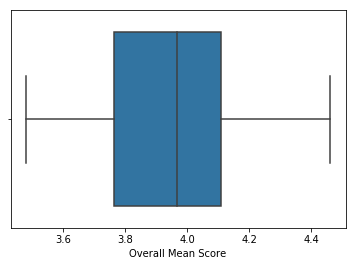

In [165]:
sns.boxplot(oms)

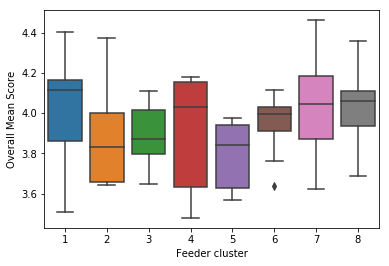

In [167]:
sns.boxplot(fc, oms)

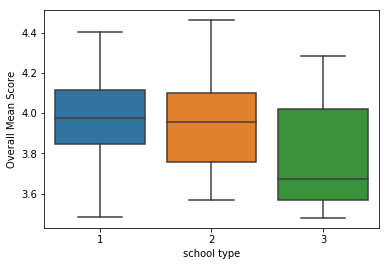

In [166]:
sns.boxplot(st,oms)

So from these plots we can see that there is only one outlier and it is only an outlier compared to the other things in its feeder cluster, which is otherwise very close together, scorewise. It seems reasonable that this is an outlier that is meant to be there so we don't need to do anything about it. We can check this though using a 2.5 time the std on 'Overall Mean Score', so I created a function that takes a variable and then returns the value for 2.5 standard deviations above or below the mean along with a check to see if there is a maximum/minumum outside those numbers. All values are contained within this range, so we have no outliers. Also included is a heat map showing the correlation between the variables. What is clear is that all the variables are strongly positvely correlated with each other.

(4.537473673103309, False, 3.349688720059085, False) (4.532904872793392, False, 3.3530951272066107, False) (4.543161675983473, False, 3.345171657349861, False)


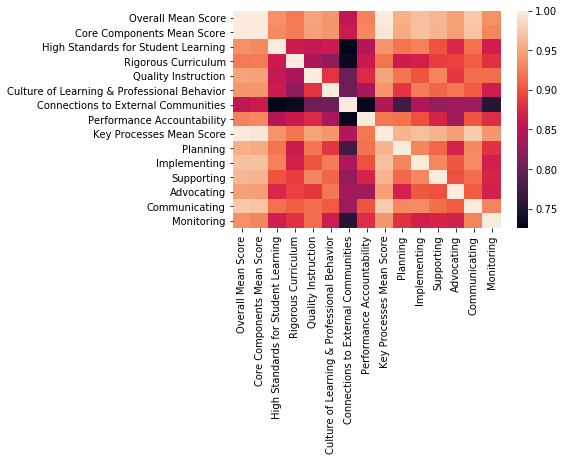

In [219]:
no_cat = principal_df.drop(['school type', 'Feeder cluster'], 1)
sns.heatmap(no_cat.corr())
def outlier_check(variable, sensitivity):
    a = variable.std()
    b = variable.mean()
    c = sensitivity*a
    d = b + c
    e = b - c
    y = variable.max()
    z = variable.min()
    x = d<=y
    w = e>=z
    return d , x , e, w
print(outlier_check(oms, 2.5),outlier_check(ccms, 2.5), outlier_check(kpms, 2.5))

Since we were playing around with that outlier function and saw that cluster 7 does have an outlier, let's pass that through the function and see if it comes out as true.

In [220]:
fc_df = principal_df.set_index('Feeder cluster')
fc7 = fc_df.loc[7]
oms7 = fc7['Overall Mean Score']
print(oms7.describe())
outlier_check(oms7, 2.5)

count    7.000000
mean     4.034258
std      0.280335
min      3.622500
25%      3.871667
50%      4.044167
75%      4.184487
max      4.460833
Name: Overall Mean Score, dtype: float64


(4.7350960893711145, False, 3.333420394145368, False)

Well, according to this, group 7 has no outlier (so it seems to be an artifact of the box plot and nothing more, though weirdly the box plot doesn't show that there is a very high max) and everything is good. Now let's finish this by making some box plots for 'Overall Mean Scores', 'Core Component Mean Score', and 'Key Processes Mean Score'. We'll define a function so that the y axis can be easily adjusted to fit the range of the data. Also, we'll include error bars to get an idea if there is actually much variation between schools in different localities.

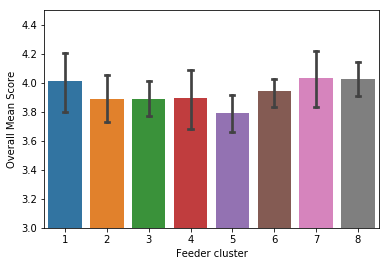

In [324]:
def bar1(category, var, bottom, top):
    sns.barplot(category, var, capsize=.1)
    plt.ylim(bottom,top)
omsplt = bar1(fc,oms,3.0,4.5)

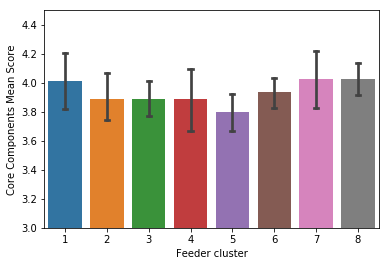

In [320]:
ccmsplt = bar1(fc, ccms,3.0,4.5)

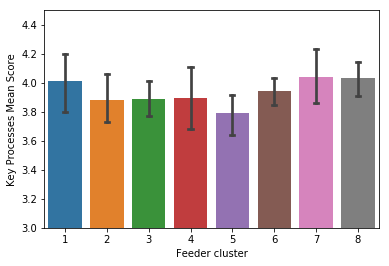

In [321]:
kpmsplt = bar1(fc, kpms,3.0,4.5)

Unsurprisingly, these graphs all look pretty much the same. This does make sense, seeing as the variables are basically perfectly correlated with each other, according to the heatmap. Let's take one of the variable 'Connections to External Communities' that has lower correlation with 'Overall Mean Score' and see if that creates a different looking graph. We'll see if it has any outliers too, since we already have a function to do that.

(4.4539236539793805, False, 3.1934096793539544, True)


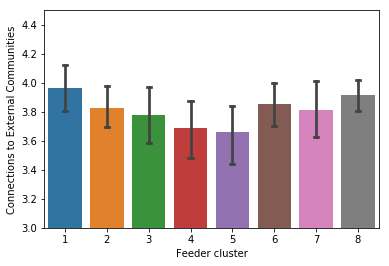

In [322]:
cec = principal_df['Connections to External Communities']
print(outlier_check(cec, 2.5))
cecplt = bar1(fc, cec,3.0,4.5)

Well, it looks pretty similar, except that all the schools do worse in this, 7 has a lower mean compared to 6 and 8 and there is a bit more of a dip compared to the others. Since the outlier does in fact exist, lets mess around with our sensitivity parameter to show off that nifty feature and then also do a graph with different y-ranges as another demonstration.

(4.579975051441923, False, 3.067358281891412, False)


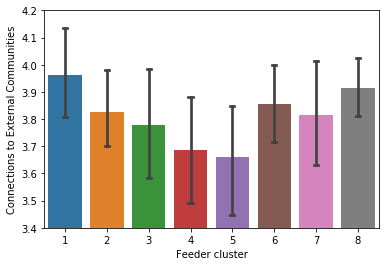

In [323]:
print(outlier_check(cec, 3.0))
cecplt2 = bar1(fc, cec, 3.4,4.2)

Well, that seems sufficient for this portion. I explored some pre-cleaned data and then made some plots to show that actually the scores don't really vary between different locations. At least, it doesn't seem to be the case. And, something that will hopefully appear later, I made a useful function for lazily and simply checking outliers.

# Part 2: Wikipedia
The first step is getting the Wikipedia API (which doesn't come with anaconda so I had to get it elsewhere), and then importing it

In [11]:
import wikipedia ##getting the Wikipedia API
from bs4 import BeautifulSoup ##to do webscraping
import requests ##to create a text file from the page I want
import time ##to not be too terrible of a person while scraping
import re # regex later on

Let's see if that worked right. It did! I then started messing around with the wikipedia API and realized that it would be too difficult the question that I wanted to answer. So instead I looked up how to scrape a table from wikipedia and then tried to do that, as detailed below. (The html doesn't like github, so I commented that out)

In [12]:
url = "https://en.wikipedia.org/wiki/Austronesian_languages#Comparison_chart"
table_url = requests.get(url).text
##this should create text file that I can read into beautiful soup file
soup = BeautifulSoup(table_url, 'lxml')
#print(soup.prettify()) ##viewing the the whole webpage in html :/, commeted out for space concerns

The next thing to do is extract the table with **soup.findAll**. I inspected the page to find what I wanted and then put it in. By using findAll it looks through all the tables with that class, instead of just scraping the first table.
The second table is what I want, so I tell it to find that element. Like with above, I commented out the html for space concerns.

In [232]:
num_tab = soup.findAll('table',{'class':'wikitable'})[1]
#num_tab
#commented out to preserve space on github

It successfully pulled out the table I wanted! Now the next task is to make the table into something more readable and put into into a pandas dataframe. I used the **html_table_extractor library** which makes this easier and then followed some online instructions for how to actually pull out the table. This creates a series of lists which if I put directly into pandas makes a data frame with only a single column and each list as a row. So I had to write a for loop that would divide up each observation. I then reshaped the data so that the languages were observations and the words were variables. The extractor worked well for pulling out the html, but it left in **\n** and footnotes. So before I placed it into a dataframe, I stripped **\n** (and then removed the one that wasn't at the end) and used regular expressions to get rid of the numbers in footnotes (and * which means a reconstructed word in historical linguistics)

In [14]:
from html_table_extractor.extractor import Extractor

In [15]:
extractor = Extractor(str(num_tab)) #converts the previous html I scraped into a string
extractor.parse() #parses it, I dunno what happens here, I was just following instructions
lang = extractor.return_list() #returns a list of lists with the contents of each row as a list


In [233]:
df = pd.DataFrame() #Get an empty data frame 

## Next set of code cleans up the html by removing '\n' and footnotes
for row in lang:
    for i in range(len(row)):
        row[i] = row[i].strip() #removes '\n' at the end of each entry
        row[i] = re.sub(r'(\[\d+\])|[*]', '', row[i]) #removes footnotes and other things I don't want
        row[i] = re.sub(r'\n', ' ', row[i]) #gets rid of one pesky '\n' that remained

row_c = 0 #used to move from one column to the next
for x in lang:
    df[lang[row_c][0]] = lang[row_c][1:] #adds a new column with the name being the language that has rows for each word
    row_c +=1 #move onto the next column
df = df.set_index('English') #define the index column as the english words
df = df.transpose() #transpose the dataframe so that now each language is its own row
df

English,one,two,three,four,person,house,dog,road,day,new,we,what,fire
Proto-Austronesian,"əsa, isa",duSa,təlu,əpat,Cau,"balay, Rumaq",asu,zalan,"qaləjaw, waRi",baqəRu,"kita, kami","anu, apa",Sapuy
Tetum,ida,rua,tolu,haat,ema,uma,asu,dalan,loron,foun,ita,saida,ahi
Amis,cecay,tosa,tolo,sepat,tamdaw,luma,wacu,lalan,cidal,faroh,kita,uman,namal
Puyuma,sa,dua,telu,pat,taw,rumah,soan,dalan,wari,vekar,mi,amanai,"apue,asi"
Tagalog,isa,dalawa,tatlo,apat,tao,bahay,aso,daan,araw,bago,tayo / kami,ano,apoy
Bikol,sarô,duwá,tuló,apat,táwo,harong,áyam,dálan,aldaw,bâgo,kitá,anó,kalayó
Rinconada Bikol,əsad,darwā,tolō,əpat,tawō,baləy,ayam,raran,aldəw,bāgo,kitā,onō,kalayō
Waray,usa,duha,tulo,upat,tawo,balay,"ayam,ido",dalan,adlaw,bag-o,kita,anu,kalayo
Cebuano,"usa,isa",duha,tulo,upat,tawo,balay,iro,dalan,adlaw,bag-o,kita,unsa,kalayo
Hiligaynon,isa,duha,tatlo,apat,tawo,balay,ido,dalan,adlaw,bag-o,kita,ano,kalayo


The table worked and looks great! As we can see, there seem to be a lot of cognates. What would be really interesting is if we can take a word, define certain w . Now, it took a lot of talking to my CS major roommate to figure out how to make this function, but it basically is a double for-loop that takes in a column and then uses regular expressions to find everything that fits those rules, counting if they do. I then took for columns 'house', 'dog', 'we', and 'person', which looked like they had at least 2 patterns. I defined some rules ((*rumah*, *balay*), (*asu*, *anjing*), (*kita*, *kami*, *toko*), and (*tau*, *orang*, *tolay*) respectively) and then ran these rules through the cognate finder to create appropriate dictionaries.

In [303]:
def cognate(var, rule):   ##defines a function "cognate" which counts cognate classes according to set rules
    y = dict() ##creates a dictionary for counting purposes
    for e in var: #goes through each element in the column
        for r in rule: #runs through each element in rule 
            if len(re.findall(r, e)) == 0: #checks to see if the element/row fits the rule
                continue #moves on to the next rule if it does
            y[r] = y.get(r,0) + 1 #increases the count for that rule by one if it did find the element fit the rule
    return(y) #the end result, which is a dictionary that uses the rules as keys and the counts as values

house_r = [r'.*um.*',r'.*al.*']            
dog_r = [r'.*a.u.*',r'.*anj.*']
we_r = [r'.*it.*', r'.*am.*', r'.*oko.*']
person_r = [r'.*ta.*',r',*a.*ng.*', r't.l.*|t.h.*']
dfh = df.house
dfd = df.dog
dfw = df.we
dfp = df.person
house = cognate(dfh, house_r)
dog = cognate(dfd, dog_r)
we = cognate(dfw, we_r)
person = cognate(dfp,person_r)

Now let's make some graphs, first by defining a form of barplot that reads cognate dictionaries and then spits out the values in an easy to interpret way, so that we can see which forms are the most common according to the rules we wrote. Then we can probably call this section good.

In [327]:
def cogplt(dictionary, string_label): #defines a way of plotting values from a dictionary
    plt.bar(dictionary.keys(), dictionary.values())
    plt.xlabel('Cognates for ' + string_label + ' in selected Austronesian languages')
    plt.ylabel('Number Counted')

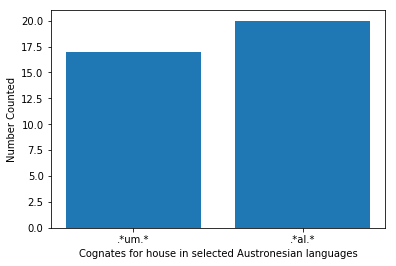

In [328]:
cogplt(house,'house')

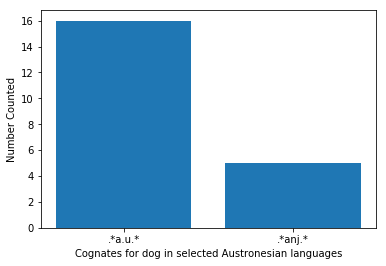

In [316]:
cogplt(dog, 'dog')

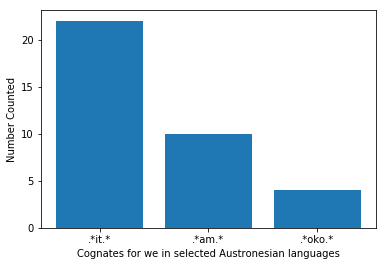

In [317]:
cogplt(we, 'we')

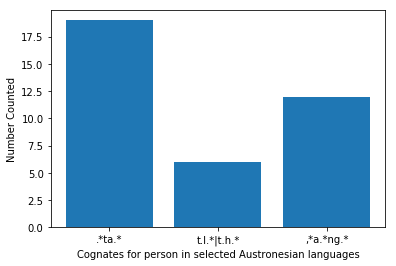

In [318]:
cogplt(person, 'person')

Well, as we can see above, everything worked out. The function reads a column, spits out a dictionary, and then the dictionary can be plotted to see which forms are most common. Interestingly, pretty much all the words had a dominant form (according to the rules given), except 'house' which was pretty evenly split between the two forms given.

# Part 3: CSV 

I got a CSV from the Minorities at Risk (MAR) database. I have never seen it before so we get to learn to together what it is like. 

In [47]:
mar_df = pd.read_csv("marupdate_20042006.csv")

In [48]:
mar_df.head() #Taking a look at the data to see what might need cleaning

,numcode,VMAR_Group,ccode,country,VMAR_Region,year,GPOP,CPOP,GPRO,LANG,...,CCGROUPSEV1,CCGROUP2,CCGROUPSEV2,CCGROUP3,CCGROUPSEV3,PROT,REB,REPGENCIV,REPNVIOL,REPVIOL
0,201,African-Americans,2,United States of America,Western Democracies and Japan,2004,37771928,292805643,0.129,0,...,1,-99,0,-99,0,3,0,0,0,0
1,201,African-Americans,2,United States of America,Western Democracies and Japan,2005,38130263,295583436,0.129,0,...,3,-99,0,-99,0,4,0,0,0,0
2,201,African-Americans,2,United States of America,Western Democracies and Japan,2006,38499072,298442420,0.129,0,...,3,-99,0,-99,0,3,0,0,0,0
3,202,Hispanics,2,United States of America,Western Democracies and Japan,2004,43920846,292805643,0.150,1,...,3,Blacks,3,-99,0,3,0,0,0,0
4,202,Hispanics,2,United States of America,Western Democracies and Japan,2005,44337515,295583436,0.150,1,...,3,Blacks,3,-99,0,5,0,0,0,0


We can see that this data set uses -99 to code some sort of missing variable. However, from here it seems that it mostly appears in columns that already have non-integet data, so hopefully that will cause problems. It also seems that this has lots of different categorical variables (which is sort of confirmed below, with the large number of objects). The [code book](http://www.mar.umd.edu/data/mar_codebook_Feb09.pdf) is very essential for understanding the data. Let's first look at what sorts of data we have, then check for missing variables before cutting down on the number of variables by only looking at a single year. 

In [24]:
mar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 76 columns):
numcode        852 non-null int64
VMAR_Group     852 non-null object
ccode          852 non-null int64
country        852 non-null object
VMAR_Region    852 non-null object
year           852 non-null int64
GPOP           852 non-null int64
CPOP           852 non-null int64
GPRO           852 non-null float64
LANG           852 non-null int64
CUSTOM         852 non-null int64
BELIEF         852 non-null int64
RELIGS1        852 non-null int64
RACE           852 non-null int64
GROUPCON       852 non-null int64
GC119          852 non-null int64
GC2            852 non-null int64
GC6B           852 non-null int64
GC7            852 non-null int64
GC10           852 non-null int64
GC11           852 non-null int64
AUTLOST        852 non-null float64
YEARWT         852 non-null int64
MAGN           852 non-null int64
PRSTAT         852 non-null int64
AUTONEND       849 non-null object
TRA

In [25]:
print(mar_df.columns[mar_df.isnull().any()]) ##checking for missing variables

Index(['AUTONEND', 'TRANSYR', 'FACTCC1', 'FACTCC2', 'FACTCC3', 'CCGROUP1',
       'CCGROUP2', 'CCGROUP3'],
      dtype='object')


Up to this point, we know that this is a highly categorical data set with lots of different observations, each one over the course of 3 years. There are some variables that have missing data, these are mostly ones that simply aren't relevant for many groups (for example 'AUTONEND' codes when the group lost autonomy, however many of these groups have never had autonomy in the first place). For ease, I am going to narrow our data so that I am only looking at data from 2004. Then I will probably mostly restrict myself to the non-categorical variables, since those ones can get more confusing (that's before dealing with all the -99).

In [329]:
mar_dfy = mar_df.set_index('year') #indexes this to the year variables

In [394]:
y2004 = mar_dfy.loc[2004] #create a new dataframe that is only observations from 2004
y2004

,numcode,VMAR_Group,ccode,country,VMAR_Region,GPOP,CPOP,GPRO,LANG,CUSTOM,...,CCGROUPSEV1,CCGROUP2,CCGROUPSEV2,CCGROUP3,CCGROUPSEV3,PROT,REB,REPGENCIV,REPNVIOL,REPVIOL
year,,,,,,,,,,,,,,,,,,,,,
2004,201,African-Americans,2,United States of America,Western Democracies and Japan,37771928,292805643,0.1290,0,0,...,1,-99,0,-99,0,3,0,0,0,0
2004,202,Hispanics,2,United States of America,Western Democracies and Japan,43920846,292805643,0.1500,1,1,...,3,Blacks,3,-99,0,3,0,0,0,0
2004,203,Native Americans,2,United States of America,Western Democracies and Japan,2928056,292805643,0.0100,1,1,...,-99,0,0,0,0,1,0,0,0,0
2004,204,Native Hawaiians,2,United States of America,Western Democracies and Japan,409928,292805643,0.0014,0,0,...,0,0,0,0,0,1,0,0,0,0
2004,2001,Quebecois,20,Canada,Western Democracies and Japan,6407672,32134763,0.1994,1,0,...,0,NaN,0,NaN,0,3,0,0,0,0
2004,2002,French Canadians,20,Canada,Western Democracies and Japan,1413930,32134763,0.0440,1,0,...,0,NaN,0,NaN,0,0,0,0,0,0
2004,2003,Indigenous Peoples,20,Canada,Western Democracies and Japan,867639,32134763,0.0270,1,1,...,-99,NaN,0,NaN,0,3,0,0,0,0
2004,4201,Haitian Blacks,42,Dominican Republic,Latin America and the Caribbean,716098,8951229,0.0800,2,1,...,1,NaN,0,NaN,0,0,0,3,0,0
2004,7002,Mayans,70,Mexico,Latin America and the Caribbean,3022836,104959594,0.0288,1,1,...,0,0,0,0,0,3,0,0,0,0


In [91]:
print(y2004.columns[y2004.isnull().any()]) ##checking for missing variables, it comes out the same as the total
country = y2004['country']
print(country.unique()) #just wanna see which countries are included

Index(['AUTONEND', 'TRANSYR', 'FACTCC1', 'FACTCC2', 'FACTCC3', 'CCGROUP1',
       'CCGROUP2', 'CCGROUP3'],
      dtype='object')
['United States of America' 'Canada' 'Dominican Republic' 'Mexico'
 'Guatemala' 'Honduras' 'El Salvador' 'Nicaragua' 'Costa Rica' 'Panama'
 'Colombia' 'Venezuela' 'Guyana' 'Ecuador' 'Peru' 'Brazil' 'Bolivia'
 'Paraguay' 'Chile' 'Argentina' 'United Kingdom' 'France' 'Switzerland'
 'Spain' 'Germany' 'Hungary' 'Czech Republic' 'Slovakia' 'Italy' 'Albania'
 'Macedonia' 'Croatia' 'Yugoslavia' 'Bosnia' 'Greece' 'Cyprus' 'Bulgaria'
 'Moldova' 'Romania' 'Russia' 'Estonia' 'Latvia' 'Lithuania' 'Ukraine'
 'Belarus' 'Georgia' 'Azerbaijan' 'Mali' 'Senegal' 'Mauritania' 'Niger'
 'Guinea' 'Sierra Leone' 'Ghana' 'Togo' 'Cameroon' 'Nigeria' 'Chad'
 'Rep. of the Congo' 'Dem. Rep. of the Congo' 'Uganda' 'Kenya' 'Tanzania'
 'Burundi' 'Rwanda' 'Somalia' 'Djibouti' 'Ethiopia' 'Eritrea' 'Angola'
 'Zambia' 'Zimbabwe' 'South Africa' 'Namibia' 'Botswana' 'Madagascar'
 'Morocco' 'Alge

In [395]:
my_homes = y2004.set_index('country')
my_homes.loc[['Indonesia', 'Ethiopia', 'South Africa', 'United States of America', 'Brazil']] 
#Just seeing all the different places I've lived

,numcode,VMAR_Group,ccode,VMAR_Region,GPOP,CPOP,GPRO,LANG,CUSTOM,BELIEF,...,CCGROUPSEV1,CCGROUP2,CCGROUPSEV2,CCGROUP3,CCGROUPSEV3,PROT,REB,REPGENCIV,REPNVIOL,REPVIOL
country,,,,,,,,,,,,,,,,,,,,,
Indonesia,85003,Chinese,850,Asia,6780124,226004132,0.0300,1,1,2,...,0,NaN,0,NaN,0,0,0,0,0,0
Indonesia,85005,Papuans,850,Asia,1152621,226004132,0.0051,1,1,2,...,3,-99,0,-99,0,3,1,5,5,5
Indonesia,85006,Acehnese,850,Asia,2576447,226004132,0.0114,1,1,0,...,3,-99,0,-99,0,3,5,5,3,5
Ethiopia,53001,Afars,530,Sub-Saharan Africa,2905488,72637206,0.0400,2,1,0,...,3,NaN,0,NaN,0,0,1,0,0,4
Ethiopia,53004,Oromo,530,Sub-Saharan Africa,29054882,72637206,0.4000,0,0,0,...,5,Tigrayan,4,NaN,0,4,5,3,5,5
Ethiopia,53005,Somalis,530,Sub-Saharan Africa,4358232,72637206,0.0600,2,1,0,...,3,Afars,3,NaN,0,0,5,5,0,5
Ethiopia,53006,Tigreans,530,Sub-Saharan Africa,5084604,72637206,0.0700,2,1,2,...,4,NaN,0,NaN,0,0,0,0,0,0
Ethiopia,53007,Amhara,530,Sub-Saharan Africa,18159302,72637206,0.2500,2,1,2,...,0,NaN,0,NaN,0,0,0,2,5,0
South Africa,56001,Asians,560,Sub-Saharan Africa,1222855,47032866,0.0260,1,1,2,...,3,NaN,0,NaN,0,1,0,0,0,0


Okay, we're off to a good start. Let's start by looking at our float variables, since these probably are the easiest to compare between countries. There are 3: 'GRPO' (percent of country that is in that group), 'AUTLOST' (an index of how bad a group lost its autonomy) and 'AUTPRO' (percent of the group that lives in Autonomous regions)

In [396]:
y2004.describe(include='float')

,GPRO,AUTLOST,AUTPRO
count,284.000000,284.000000,284.000000
mean,0.116700,0.837089,-10.245705
std,0.145608,0.937790,44.287423
min,0.000070,0.000000,-99.000000
25%,0.020000,0.000000,0.000000
50%,0.060150,0.600000,0.000000
75%,0.151000,1.000000,0.000000
max,0.850000,5.000000,100.000000


Well, there's an obvious problem here with 'AUTPRO' in that some groups don't have autonomous regions to live in, so it is irrelevant (-99). Considering that the mean is below 0 (and the 75% is 0), this means that it is likely that most of the observations are coded at -99. That being said, let's look at it anyway, along with checking GPRO for outliers

(0.480720056947326, True, -0.24731956398957963, False)


 0.0000      221
-99.0000      45
 100.0000      4
 97.0000       2
 0.3197        1
 97.4000       1
 95.0000       1
 94.0000       1
 83.5000       1
 87.0000       1
 88.0000       1
 92.0000       1
 38.0000       1
 86.0000       1
 91.0000       1
 99.0000       1
Name: AUTPRO, dtype: int64

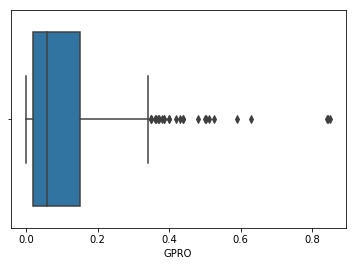

In [397]:
gpro = y2004.GPRO
print(outlier_check(gpro, 2.5))
sns.boxplot(gpro)
y2004.AUTPRO.value_counts()

There's some important things from here. First of all, GPRO does have outliers above the maximum, in fact a fair amount. However, seeing as the max is below 1, this probably is not a coding error. Instead, these are likely to be just how the data is, with certain countries having groups that are the majority numerically but having little power and therefore being a 'minority at risk'. We also see that most groups have no autonomous region. It is still unclear how this is different from -99, but I'll look into the data and see if it seems reasonable to change all -99 to 0.

In [398]:
y2004.groupby('country')['AUTPRO'].value_counts()

country                   AUTPRO
Afghanistan                0.0      3
                          -99.0     1
Albania                    0.0      1
Algeria                    0.0      1
Angola                     0.0      3
Argentina                  0.0      2
Australia                  0.0      1
Azerbaijan                 0.0      2
                          -99.0     1
Bahrain                    0.0      1
Bangladesh                 0.0      2
                           100.0    1
Belarus                    0.0      2
Bhutan                     0.0      1
Bolivia                    0.0      2
Bosnia                    -99.0     1
                           0.0      1
                           91.0     1
Botswana                   0.0      1
Brazil                    -99.0     1
                           0.0      1
Bulgaria                   0.0      2
Burma                      0.0      5
                          -99.0     1
Burundi                    0.0      2
Cambodia         

Well, clearly there are countries that have both 0 and -99 for AUTPRO. 

In [399]:
y2004.loc[:,:'AUTPRO']

,numcode,VMAR_Group,ccode,country,VMAR_Region,GPOP,CPOP,GPRO,LANG,CUSTOM,...,EMIG,DISPLACE,POLDIS,ECDIS,CULPO1,CULPO2,GOJPA,AUTON2,AUTGAIN,AUTPRO
year,,,,,,,,,,,,,,,,,,,,,
2004,201,African-Americans,2,United States of America,Western Democracies and Japan,37771928,292805643,0.1290,0,0,...,0,0,1,1,0,0,2,0,-99,0.0
2004,202,Hispanics,2,United States of America,Western Democracies and Japan,43920846,292805643,0.1500,1,1,...,0,0,1,1,0,1,2,0,-99,0.0
2004,203,Native Americans,2,United States of America,Western Democracies and Japan,2928056,292805643,0.0100,1,1,...,0,0,1,1,0,0,2,1,1975,-99.0
2004,204,Native Hawaiians,2,United States of America,Western Democracies and Japan,409928,292805643,0.0014,0,0,...,0,0,0,1,0,0,2,0,-99,0.0
2004,2001,Quebecois,20,Canada,Western Democracies and Japan,6407672,32134763,0.1994,1,0,...,0,0,0,0,0,0,2,0,-99,0.0
2004,2002,French Canadians,20,Canada,Western Democracies and Japan,1413930,32134763,0.0440,1,0,...,0,0,0,1,0,0,2,0,-99,0.0
2004,2003,Indigenous Peoples,20,Canada,Western Democracies and Japan,867639,32134763,0.0270,1,1,...,0,0,1,1,0,0,2,1,1999,-99.0
2004,4201,Haitian Blacks,42,Dominican Republic,Latin America and the Caribbean,716098,8951229,0.0800,2,1,...,2,0,4,4,1,1,2,0,-99,0.0
2004,7002,Mayans,70,Mexico,Latin America and the Caribbean,3022836,104959594,0.0288,1,1,...,0,0,3,3,0,0,3,0,-99,0.0


That makes it more clear (sort of) for what is going on. Countries with groups that have a date when they gained autonomy but what appears to be no records about how many of those people actually live there get a -99. However, there are a couple that never gained autonomy and still have -99 (probably a coding error). For the purposes of this project, I'll just treat -99 as 0 in this category since it seems to be the most appropriate for our purposes. 

In [402]:
y2004['AUTPRO'] = y2004['AUTPRO'].replace(-99, 0)
y2004.describe(include='float')

/Users/jacobbills/Desktop/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,GPRO,AUTLOST,AUTPRO
count,284.000000,284.000000,284.000000
mean,0.116700,0.837089,5.440914
std,0.145608,0.937790,21.875790
min,0.000070,0.000000,0.000000
25%,0.020000,0.000000,0.000000
50%,0.060150,0.600000,0.000000
75%,0.151000,1.000000,0.000000
max,0.850000,5.000000,100.000000


That worked, apparently (and now I can't run anything before this point or it doesn't make sense). Let's go back to the question of outliers in GPRO and then see if there is a correlation between the proportion of the population in a group and the amount of the group in autonomous regions. I'm using only 2 standard deviations because that probably gets a little closer to how it looks in the box plot.

In [418]:
outlier_max_gpro = outlier_check(gpro, 2)[0]
y2004.loc[gpro>=outlier_max_gpro]

,numcode,VMAR_Group,ccode,country,VMAR_Region,GPOP,CPOP,GPRO,LANG,CUSTOM,...,CCGROUPSEV1,CCGROUP2,CCGROUPSEV2,CCGROUP3,CCGROUPSEV3,PROT,REB,REPGENCIV,REPNVIOL,REPVIOL
year,,,,,,,,,,,,,,,,,,,,,
2004,9002,Indigenous Peoples,90,Guatemala,Latin America and the Caribbean,5134194,11939986,0.4300,1,1,...,0,NaN,0,NaN,0,3,0,0,4,5
2004,11002,East Indians,110,Guyana,Latin America and the Caribbean,693463,1386926,0.5000,0,0,...,3,NaN,0,NaN,0,0,0,0,0,0
2004,14501,Indigenous Highland Peoples,145,Bolivia,Latin America and the Caribbean,4469333,8895965,0.5024,1,1,...,0,-99,0,-99,0,3,1,0,0,5
2004,34603,Muslims,346,Bosnia,Post-communist States,2085884,4345591,0.4800,0,0,...,3,Croats,3,NaN,0,2,0,0,0,0
2004,46101,Ewe,461,Togo,Sub-Saharan Africa,2312341,5255320,0.4400,1,0,...,0,-99,0,-99,0,0,0,0,0,0
2004,51601,Hutus,516,Burundi,Sub-Saharan Africa,6388780,7516212,0.8500,0,0,...,5,Christian Clergy,-99,NaN,0,0,5,5,0,5
2004,51702,Hutus,517,Rwanda,Sub-Saharan Africa,7713072,9127896,0.8450,0,0,...,0,NaN,0,NaN,0,0,0,1,0,0
2004,64506,Shi'is,645,Iraq,Middle East and North Africa,15986055,25374691,0.6300,0,0,...,5,NaN,0,NaN,0,4,6,2,0,5
2004,66302,Palestinians,663,Jordan,Middle East and North Africa,67029246,127480498,0.5258,0,0,...,0,-99,0,-99,0,3,0,0,4,0


I can't explain why Fijians or Taiwanese are minority groups in their own country (or Pashtun for that matter, seeing as the Taliban is Pashtun...maybe that's why?) but so they are. Others of these, like the Hutu in Burundi and Rwanda, make sense having a high percentage of the population and also being a minority group. Anyway, all of the outliers seem very reasonable (if they are gonna include Taiwanese, they must mean it) so let's make a graph.

            GPRO    AUTPRO
GPRO    1.000000 -0.070797
AUTPRO -0.070797  1.000000


/Users/jacobbills/Desktop/python/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/jacobbills/Desktop/python/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


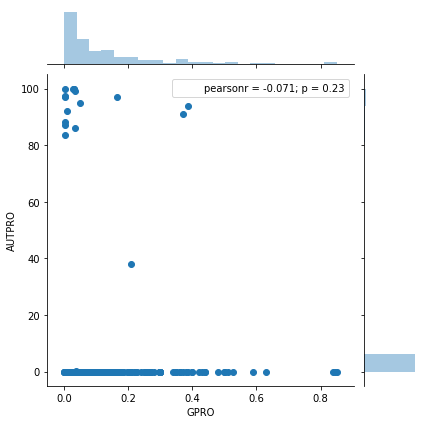

In [426]:
y2004_corr = y2004[['GPRO', 'AUTPRO']]
print(y2004_corr.corr())
sns.jointplot(gpro,y2004.AUTPRO)

There is extremely low correlation between these two variables, and interestingly, as the total percentage goes up, the amount living in autonomous regions go down. Now that we've kind of explored the data a bit, lets visualize the means of GPRO divided into the world region categories.

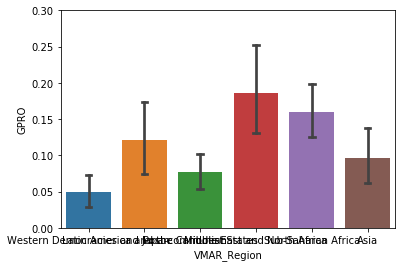

In [424]:
region = y2004.VMAR_Region
bar1(region,gpro,0,.3)